# Edubridge India: EXL Associate Data Analytics Training
## Name: Sukhpal
## Batch : 2021-5477
## Enrollment Number : EBEON0421366907
## Major Project: Used Car Auction Prices Prediction

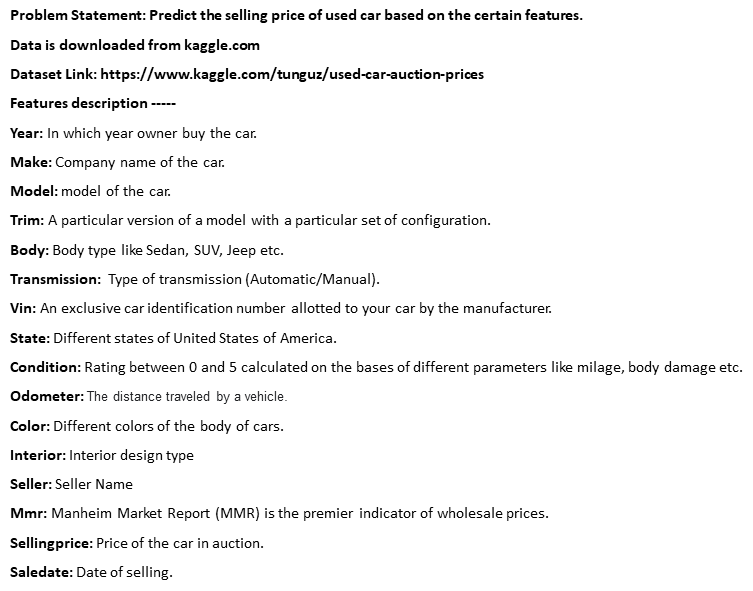

### Importing the libraries

In [1]:
import pandas as pd # For reading the dataset as DataFrame
import numpy as np # For numerical calculations
import matplotlib.pyplot as plt # For simple visualizations
import seaborn as sns # For advanced visualizations
import warnings as w # To ignore the warnings
w.filterwarnings('ignore')

### Reading the dataset

In [2]:
cars = pd.read_csv('car_prices.csv')

In [3]:
# Top Five Observations
cars.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2005,Ford,Focus,ZXW SES,Wagon,automatic,1fahp36n35w301827,fl,NaN,160870.0,green,tan,champion auto wholesale inc,1575,2000,Wed Dec 17 2014 15:15:00 GMT-0800 (PST)
1,2005,Ford,Focus,ZXW SES,Wagon,automatic,1fafp36n65w254395,fl,NaN,52172.0,silver,gray,palm coast ford,3450,2300,Wed Dec 17 2014 15:00:00 GMT-0800 (PST)
2,2007,Ford,Focus,ZXW SES,Wagon,automatic,1fahp36n77w229338,wa,2.0,148585.0,white,gray,liquidation llc,1725,1750,Tue Dec 30 2014 13:40:00 GMT-0800 (PST)
3,2005,Ford,Focus,ZXW SES,Wagon,automatic,1fafp36nx5w215180,tx,1.9,95675.0,red,gray,manheim el paso,2700,1000,Thu Jan 08 2015 12:00:00 GMT-0800 (PST)
4,2005,Ford,Focus,ZXW SES,Wagon,automatic,1fafp36n95w215851,ga,2.7,140870.0,blue,gray,automobile acceptance corp,1875,2400,Thu Jan 08 2015 02:00:00 GMT-0800 (PST)


- In condition there are two missing values in first five rows.

In [4]:
# Last Five Observations
cars.tail()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
558832,2000,NaN,NaN,NaN,NaN,automatic,4n2xn11txyd844711,ma,3.1,108900.0,green,gray,boch toyota/scion south,1275,1100,Thu Jun 18 2015 11:30:00 GMT-0700 (PDT)
558833,2007,NaN,NaN,NaN,NaN,automatic,jtjbt20x770129305,pa,4.1,66393.0,—,beige,r hollenshead auto sales inc,18150,18500,Fri Jun 19 2015 02:00:00 GMT-0700 (PDT)
558834,2011,NaN,NaN,NaN,NaN,automatic,4a4jn2as6be029938,nv,4.1,67820.0,silver,black,imperial rides,9175,10500,Fri Jun 19 2015 05:00:00 GMT-0700 (PDT)
558835,2005,NaN,NaN,NaN,NaN,automatic,1g1yy24u355116011,tx,2.4,114787.0,burgundy,black,hopper motorplex inc,15400,14800,Wed Jun 24 2015 03:15:00 GMT-0700 (PDT)
558836,2013,NaN,NaN,NaN,NaN,automatic,zam39nka2d0068288,ga,4.2,30148.0,off-white,black,maserati north america inc,58500,47000,Wed Jun 24 2015 03:00:00 GMT-0700 (PDT)


- All the values in make, model, trim and body are null values and color has _ instead of unknown color.

In [5]:
# Any Five Observations
cars.sample(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
68957,2013,Dodge,Grand Caravan,SXT,Minivan,NaN,2c4rdgcgxdr625773,pa,3.7,64615.0,white,black,the hertz corporation,12050,12400,Fri Jan 30 2015 01:00:00 GMT-0800 (PST)
419843,2012,Toyota,RAV4,Base,SUV,automatic,2t3bf4dv9cw187453,mo,4.1,37734.0,brown,beige,toyota financial services,15400,15000,Wed Dec 31 2014 10:30:00 GMT-0800 (PST)
491718,2013,Nissan,Altima,3.5 SL,Sedan,automatic,1n4bl3ap2dc280009,il,4.1,32376.0,black,gray,nissan-infiniti lt,18350,18100,Tue Feb 17 2015 02:00:00 GMT-0800 (PST)
259474,2013,Chevrolet,Malibu,LT,Sedan,automatic,1g11c5sa8df297710,ca,3.2,53937.0,white,black,fox rent a car,11500,12250,Tue Jun 02 2015 05:30:00 GMT-0700 (PDT)
533141,2012,Kia,Soul,+,Wagon,automatic,kndjt2a66c7457451,fl,4.4,26319.0,white,black,gm financial,11650,12400,Thu Feb 12 2015 01:40:00 GMT-0800 (PST)


- In Body there are same name in two different ways like Sedan (capitalize) and sedan (lower).

In [6]:
# dataset information like total observations, total columns, non-null entries in each column, data type of the column.
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493480 non-null  object 
 6   vin           558837 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547043 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558837 non-null  int64  
 14  sellingprice  558837 non-null  int64  
 15  saledate      558837 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


- There are 558837 total observations and 16 columns in the dataset. Because all the features does not have 558837 non-null values it means some columns have missing values like make, model, trim, body, condition, odometer, color and interior. and there are only five columns have numerical data and rest are categorical data.

In [7]:
# Now we will see missing values
cars.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65357
vin                 0
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

- There are lot of missing values as I described earlier.

In [8]:
# Numerical Data only
cars_num = cars.select_dtypes(include=np.number)
cars_num

,year,condition,odometer,mmr,sellingprice
0,2005,NaN,160870.0,1575,2000
1,2005,NaN,52172.0,3450,2300
2,2007,2.0,148585.0,1725,1750
3,2005,1.9,95675.0,2700,1000
4,2005,2.7,140870.0,1875,2400
...,...,...,...,...,...
558832,2000,3.1,108900.0,1275,1100
558833,2007,4.1,66393.0,18150,18500
558834,2011,4.1,67820.0,9175,10500
558835,2005,2.4,114787.0,15400,14800


In [9]:
# Categorical Data only
cars_cat = cars.select_dtypes(exclude=np.number)
cars_cat

,make,model,trim,body,transmission,vin,state,color,interior,seller,saledate
0,Ford,Focus,ZXW SES,Wagon,automatic,1fahp36n35w301827,fl,green,tan,champion auto wholesale inc,Wed Dec 17 2014 15:15:00 GMT-0800 (PST)
1,Ford,Focus,ZXW SES,Wagon,automatic,1fafp36n65w254395,fl,silver,gray,palm coast ford,Wed Dec 17 2014 15:00:00 GMT-0800 (PST)
2,Ford,Focus,ZXW SES,Wagon,automatic,1fahp36n77w229338,wa,white,gray,liquidation llc,Tue Dec 30 2014 13:40:00 GMT-0800 (PST)
3,Ford,Focus,ZXW SES,Wagon,automatic,1fafp36nx5w215180,tx,red,gray,manheim el paso,Thu Jan 08 2015 12:00:00 GMT-0800 (PST)
4,Ford,Focus,ZXW SES,Wagon,automatic,1fafp36n95w215851,ga,blue,gray,automobile acceptance corp,Thu Jan 08 2015 02:00:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...
558832,NaN,NaN,NaN,NaN,automatic,4n2xn11txyd844711,ma,green,gray,boch toyota/scion south,Thu Jun 18 2015 11:30:00 GMT-0700 (PDT)
558833,NaN,NaN,NaN,NaN,automatic,jtjbt20x770129305,pa,—,beige,r hollenshead auto sales inc,Fri Jun 19 2015 02:00:00 GMT-0700 (PDT)
558834,NaN,NaN,NaN,NaN,automatic,4a4jn2as6be029938,nv,silver,black,imperial rides,Fri Jun 19 2015 05:00:00 GMT-0700 (PDT)
558835,NaN,NaN,NaN,NaN,automatic,1g1yy24u355116011,tx,burgundy,black,hopper motorplex inc,Wed Jun 24 2015 03:15:00 GMT-0700 (PDT)


In [10]:
# Checking duplicate entries
cars.duplicated().sum()

0

There is no duplicate entry here.

In [11]:
# Now we will see Statistical Information about numerical data
cars_num.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547043.000000,558743.000000,558837.000000,558837.000000
mean,2010.038927,3.424511,68320.437548,13769.319811,13611.207538
std,3.966864,0.949462,53398.058707,9679.649690,9749.444610
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28371.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52254.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99109.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


- Year --- Because from min to median i.e. 50% or 2nd quartile has difference of 2012-1982=30 years but in case of median to max it has only 2015-2012 = 3 years, So most of the cars are from 2012 to 2015 that is 3 years old so year data is left skewed.
- Condition --- Mean is lesser than meadian so, it also looks like left skewed.
- Odometer --- Mean is greater than median here so it is right skewed.
- MMR --- Similar to odometer, It is also right skewed.
-  Selling Price --- Selling Price is also right skewed as mean is greater than 50% of median.

Let us see, am I correct or not?

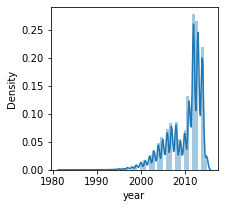

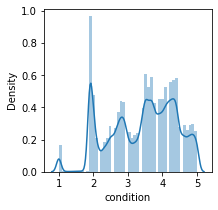

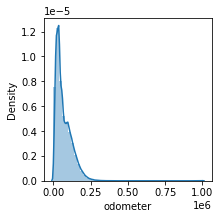

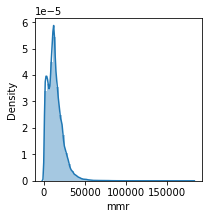

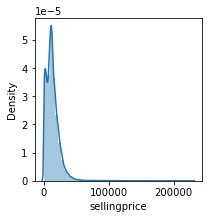

In [12]:
# Year
for i in cars_num.columns:
    plt.figure(figsize = (3,3))
    sns.distplot(cars_num[i]);

## Data Cleaning

In [13]:
# color column has _ inplace of missing value
cars.color.value_counts()

black        110974
white        106677
silver        83394
gray          82860
blue          51144
red           43573
—             24686
green         11382
gold          11342
beige          9222
burgundy       8972
brown          6717
orange         2078
purple         1561
off-white      1449
yellow         1285
charcoal        479
turquoise       236
pink             42
lime             15
Name: color, dtype: int64

- In color column there are 24686 observations has _ instead of missing data. I will replace this by np.nan.

In [14]:
# Replacing '_' with np.nan
cars['color']=cars['color'].replace('—', np.nan)

In [15]:
# Null Values
cars.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65357
vin                 0
state               0
condition       11794
odometer           94
color           25435
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

In [16]:
# Null Values %
cars.isnull().sum()/len(cars)*100

year             0.000000
make             1.843292
model            1.860829
trim             1.905922
body             2.361154
transmission    11.695181
vin              0.000000
state            0.000000
condition        2.110454
odometer         0.016821
color            4.551417
interior         0.134028
seller           0.000000
mmr              0.000000
sellingprice     0.000000
saledate         0.000000
dtype: float64

Transmission column has 11.69% values as missing data. And rest are below 5%, so , I can drop them but I need to impute values in transmission column.
Because transmission columns has values automatic/manual, So I shall find mode of the data and then need to perform fillna function in pandas.

In [17]:
# Frequency of values
cars.transmission.value_counts()

automatic    475936
manual        17544
Name: transmission, dtype: int64

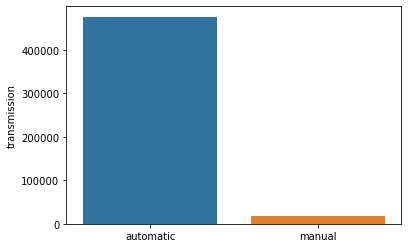

In [18]:
sns.barplot(x = cars.transmission.value_counts().index, y = cars.transmission.value_counts());

- In transmission column automatic has very high number comparing to manual so I am filling null values in this column by automatic.

In [19]:
# Filling 'automatic' in place of missing values in transmission column.
cars.transmission.fillna('automatic', inplace=True)

In [20]:
cars.isnull().sum()/len(cars)*100

year            0.000000
make            1.843292
model           1.860829
trim            1.905922
body            2.361154
transmission    0.000000
vin             0.000000
state           0.000000
condition       2.110454
odometer        0.016821
color           4.551417
interior        0.134028
seller          0.000000
mmr             0.000000
sellingprice    0.000000
saledate        0.000000
dtype: float64

- Now, missing values in all the columns are less than 5% so i am droping all the missing values

In [21]:
# Droping the observations containing null values. 
cars.dropna(inplace=True)

- All the null values are droped as you can see below.

In [22]:
print("\tNull Values")
cars.isnull().sum()

	Null Values


year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [23]:
# Body column unique and non-unique values.
cars.body.value_counts().index

Index(['Sedan', 'SUV', 'sedan', 'suv', 'Minivan', 'Hatchback', 'Coupe',
       'Wagon', 'Crew Cab', 'Convertible', 'SuperCrew', 'G Sedan', 'hatchback',
       'SuperCab', 'minivan', 'Regular Cab', 'Van', 'Extended Cab', 'Quad Cab',
       'crew cab', 'coupe', 'wagon', 'convertible', 'supercrew',
       'E-Series Van', 'g sedan', 'Double Cab', 'G Coupe', 'supercab',
       'regular cab', 'extended cab', 'quad cab', 'van', 'CrewMax Cab',
       'King Cab', 'e-series van', 'double cab', 'g coupe', 'Genesis Coupe',
       'Access Cab', 'G Convertible', 'Koup', 'Club Cab', 'CTS Coupe',
       'crewmax cab', 'king cab', 'Elantra Coupe', 'genesis coupe',
       'access cab', 'g convertible', 'Mega Cab', 'mega cab',
       'Promaster Cargo Van', 'Xtracab', 'Beetle Convertible', 'koup',
       'cts coupe', 'Q60 Convertible', 'Q60 Coupe', 'TSX Sport Wagon',
       'CTS-V Coupe', 'elantra coupe', 'club cab', 'G37 Convertible',
       'regular-cab', 'CTS Wagon', 'Transit Van', 'G37 Coupe',
       

- As you can see Sedan is in capitalize case as well as lower case but both have same significance, so I am changing all the values in lower case.

In [24]:
# Chenging all the categorical data into lowercase
for cols in cars_cat.columns:
    cars[cols] = cars[cols].str.lower()

In [25]:
# Body column unique values.
cars.body.value_counts().index

Index(['sedan', 'suv', 'hatchback', 'minivan', 'coupe', 'crew cab', 'wagon',
       'convertible', 'supercrew', 'g sedan', 'supercab', 'regular cab', 'van',
       'extended cab', 'quad cab', 'e-series van', 'double cab', 'g coupe',
       'crewmax cab', 'king cab', 'genesis coupe', 'access cab',
       'g convertible', 'koup', 'club cab', 'cts coupe', 'mega cab',
       'elantra coupe', 'promaster cargo van', 'beetle convertible', 'xtracab',
       'tsx sport wagon', 'cts-v coupe', 'q60 convertible', 'q60 coupe',
       'g37 convertible', 'transit van', 'regular-cab', 'cts wagon',
       'granturismo convertible', 'g37 coupe', 'cab plus 4', 'cab plus',
       'cts-v wagon'],
      dtype='object')

In [26]:
# % unique values in categorical columns
cars.select_dtypes(exclude = np.number).nunique()/len(cars)*100

make             0.010406
model            0.150398
trim             0.294317
body             0.008639
transmission     0.000393
vin             98.509564
state            0.007461
color            0.003731
interior         0.003338
seller           2.487464
saledate         0.720970
dtype: float64

- 98.5% values are unique in vin column so I am droping it.

In [27]:
# Droping 'vin' column
cars.drop('vin', axis=1, inplace=True)

- 'Vin' column is droped.

In [28]:
# Getting sale year from the saledate column and making new column saleyear.
cars['saleyear'] = cars['saledate'].str.split(expand=True).iloc[:,3]

In [29]:
# age is the difference between sale year (Auction Year) and year (Purchase Year/ Year Model)
cars['saleyear'] = cars['saleyear'].astype('int64') # Chenging the datatype of saleyear
cars['age'] = cars['saleyear'] - cars['year']
cars.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,saleyear,age
2,2007,ford,focus,zxw ses,wagon,automatic,wa,2.0,148585.0,white,gray,liquidation llc,1725,1750,tue dec 30 2014 13:40:00 gmt-0800 (pst),2014,7
3,2005,ford,focus,zxw ses,wagon,automatic,tx,1.9,95675.0,red,gray,manheim el paso,2700,1000,thu jan 08 2015 12:00:00 gmt-0800 (pst),2015,10
4,2005,ford,focus,zxw ses,wagon,automatic,ga,2.7,140870.0,blue,gray,automobile acceptance corp,1875,2400,thu jan 08 2015 02:00:00 gmt-0800 (pst),2015,10
5,2005,ford,focus,zxw ses,wagon,automatic,wi,2.8,87536.0,gray,gray,napletons river oaks chrysler jeep dodge,3000,4700,wed jan 07 2015 10:00:00 gmt-0800 (pst),2015,10
6,2007,ford,focus,zxw ses,wagon,automatic,nv,3.7,71340.0,gold,tan,sti remarketing,4400,5100,fri jan 09 2015 12:00:00 gmt-0800 (pst),2015,8


- As you can see in first entry saleyear is 2014 and purchase year is 2007 so total age of that car is 2014-2007 = 7 years

In [30]:
# Droping unnecessary columns year, saleyear, saledate
cars.drop(columns = ['year', 'saleyear', 'saledate'], inplace=True)

- columns year, saleyear, saledate are unnecessary to me now because I generated new column age from them so I droped them.

In [31]:
cars.head(2)

,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,age
2,ford,focus,zxw ses,wagon,automatic,wa,2.0,148585.0,white,gray,liquidation llc,1725,1750,7
3,ford,focus,zxw ses,wagon,automatic,tx,1.9,95675.0,red,gray,manheim el paso,2700,1000,10


- Now data is ready to explore and getting insights from it.

## Exploratory Data Analysis
- Exploring the data and getting insights from it.

### Selling Price
- Because selling price is target variable here so we will analyze it first.

In [32]:
# Statistical Information
cars.sellingprice.describe()

count    509314.000000
mean      13669.992590
std        9624.921068
min           1.000000
25%        7100.000000
50%       12200.000000
75%       18200.000000
max      230000.000000
Name: sellingprice, dtype: float64

- Min value here is 1 and max value is 230k so I want to explore this more.

In [33]:
cars[cars.sellingprice<100]

,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,age
274173,isuzu,rodeo,ls,suv,automatic,va,1.0,254132.0,red,gray,automotive remarketing inc,375,1,20
387705,mercedes-benz,e-class,e500,sedan,automatic,ga,2.1,1.0,black,black,peoples credit company inc,7325,1,12
393735,ford,e-series van,e-250,e-series van,automatic,tx,4.1,31886.0,white,gray,u-haul,20800,1,1


- Selling Price below 100 there are only three entries with value 1 So I am droping these also.

In [34]:
cars.drop(cars[cars.sellingprice<100].index, axis = 0, inplace = True)

In [35]:
# Statistical Information of selling price
cars.sellingprice.describe()

count    509311.000000
mean      13670.073105
std        9624.892243
min         100.000000
25%        7100.000000
50%       12200.000000
75%       18200.000000
max      230000.000000
Name: sellingprice, dtype: float64

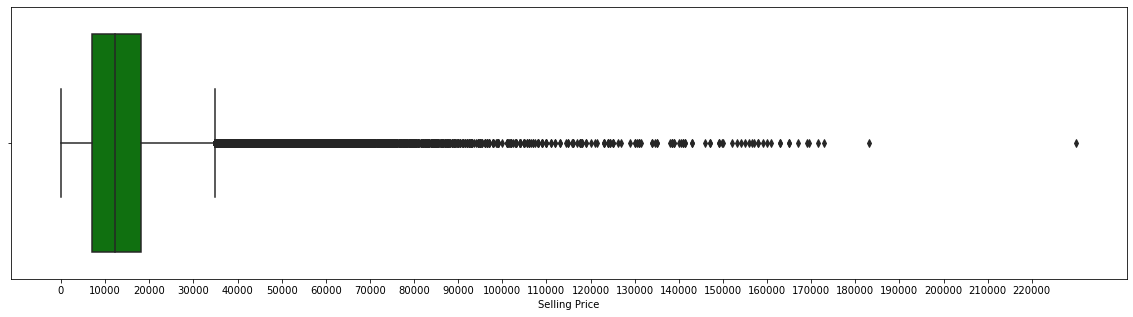

In [36]:
# Boxplot: for checking the skewness and outliers and five numbers summary
plt.figure(figsize = (20,5))
sns.boxplot(x = cars.sellingprice, color='green')
plt.xlabel('Selling Price')
plt.xticks(np.arange(0, cars.sellingprice.max(), 10000));

- There are lot of outliers in the dataset in the right side. So I want to go deeper in this.

In [37]:
cars[cars.sellingprice>160000]

,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,age
36672,bentley,continental gtc,v8,convertible,automatic,fl,4.4,2968.0,black,red,the collection,152000,163000,2
60152,ford,escape,titanium,suv,automatic,mo,4.3,27802.0,green,tan,ford-lincoln dealer program,22800,230000,1
177788,mercedes-benz,s-class,s65 amg,sedan,automatic,ca,4.1,5277.0,white,white,mercedes-benz usa,170000,173000,0
383152,rolls-royce,ghost,ewb,sedan,automatic,ca,3.6,11832.0,white,black,bentley scottsdale,164000,169000,3
425820,rolls-royce,ghost,base,sedan,automatic,fl,4.5,14316.0,black,beige,braman motorcars,154000,169500,3
428243,bmw,i8,base,coupe,automatic,ca,5.0,60.0,white,brown,ferrari of orange county,176000,165000,1
433135,rolls-royce,ghost,base,sedan,automatic,ca,4.2,12912.0,black,black,financial services remarketing (bmw int),166000,163000,4
441595,bmw,i8,base,coupe,automatic,fl,5.0,154.0,white,beige,american bank auto liquidators,170000,165000,1
449527,bmw,i8,base,coupe,automatic,ca,4.4,303.0,white,gray,phelps auto sales,161000,161000,1
466394,rolls-royce,ghost,base,sedan,automatic,ca,4.4,5215.0,white,tan,financial services remarketing (bmw int),166000,167000,3


Because selling price > 160000 there are only 12 observations but all the cars are luxury and mmr and condtition is also good for them, these are important to predict the price of luxury cars so I am not droping these. 

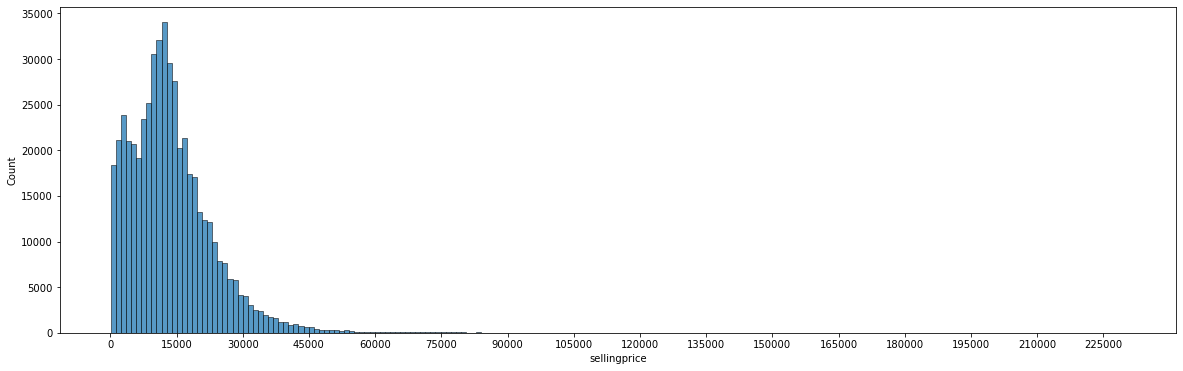

In [38]:
# Histogram: To see the shape of data and skewness and outliers more clearly.
plt.figure(figsize = (20, 6))
sns.histplot(x = cars.sellingprice, bins = 200)
plt.xticks(np.arange(0, cars.sellingprice.max(), 15000));

You can see clearly that the shape of data or skewness is right skewed. we can apply log/sqrt normalization here.

Actual distribution of selling price


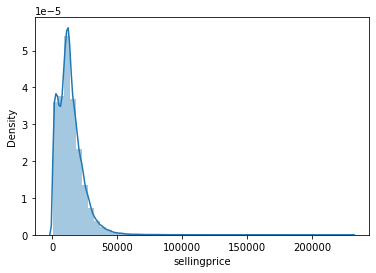

In [39]:
# Shape after applying log and sqrt normalization
print('Actual distribution of selling price')
sns.distplot(cars.sellingprice);

Log Normal Form of Selling Price


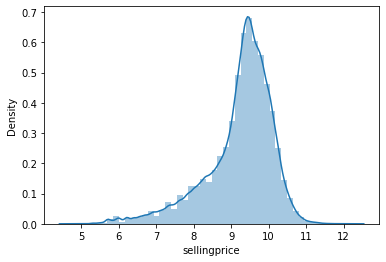

In [40]:
print('Log Normal Form of Selling Price')
sns.distplot(np.log(cars.sellingprice));

SQRT Normal Form of Selling Price


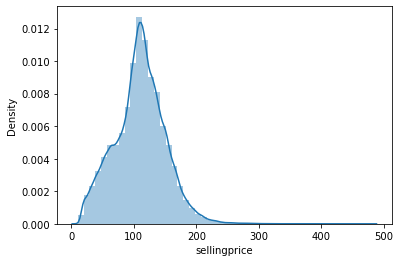

In [41]:
print('SQRT Normal Form of Selling Price')
sns.distplot(np.sqrt(cars.sellingprice));

- SQRT Normal form of sellingprice looks normally distributed.

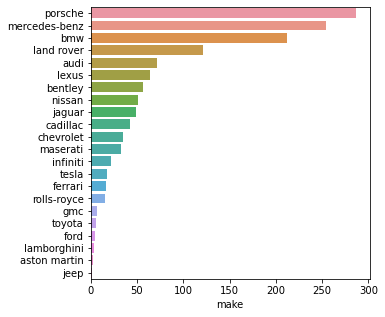

In [42]:
# Most selling Luxury Cars [Price>60000]
lux_cars = cars.loc[cars['sellingprice']>60000,'make'].value_counts()
plt.figure(figsize = (5,5))
sns.barplot(y = lux_cars.index, x = lux_cars, orient = 'h');

- Porsche's cars are sold most followed by mercedes-benz and bmw

In [43]:
# Top 10 Most Expensive cars and their makers
maker = cars.sort_values(by = 'sellingprice', ascending=False)[:10]
maker

,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,age
60152,ford,escape,titanium,suv,automatic,mo,4.3,27802.0,green,tan,ford-lincoln dealer program,22800,230000,1
467355,ferrari,458 italia,base,coupe,automatic,fl,4.6,12116.0,red,black,platinum motor cars,182000,183000,4
177788,mercedes-benz,s-class,s65 amg,sedan,automatic,ca,4.1,5277.0,white,white,mercedes-benz usa,170000,173000,0
467082,rolls-royce,ghost,base,sedan,automatic,fl,4.2,7852.0,white,beige,flag/landrover southpointe,178000,171500,2
425820,rolls-royce,ghost,base,sedan,automatic,fl,4.5,14316.0,black,beige,braman motorcars,154000,169500,3
383152,rolls-royce,ghost,ewb,sedan,automatic,ca,3.6,11832.0,white,black,bentley scottsdale,164000,169000,3
466394,rolls-royce,ghost,base,sedan,automatic,ca,4.4,5215.0,white,tan,financial services remarketing (bmw int),166000,167000,3
441595,bmw,i8,base,coupe,automatic,fl,5.0,154.0,white,beige,american bank auto liquidators,170000,165000,1
428243,bmw,i8,base,coupe,automatic,ca,5.0,60.0,white,brown,ferrari of orange county,176000,165000,1
433135,rolls-royce,ghost,base,sedan,automatic,ca,4.2,12912.0,black,black,financial services remarketing (bmw int),166000,163000,4


- Most Expensive car in this dataset is ford escape titanium followed by ferrari 458italia base and mercedes-benz s-class s65amg

In [44]:
# Selling Price Distribution of top 10 in make
cars['make'].value_counts()[:10]

ford         81940
chevrolet    57841
nissan       49793
toyota       38018
dodge        29483
honda        26055
hyundai      21112
bmw          19605
kia          17587
chrysler     16603
Name: make, dtype: int64

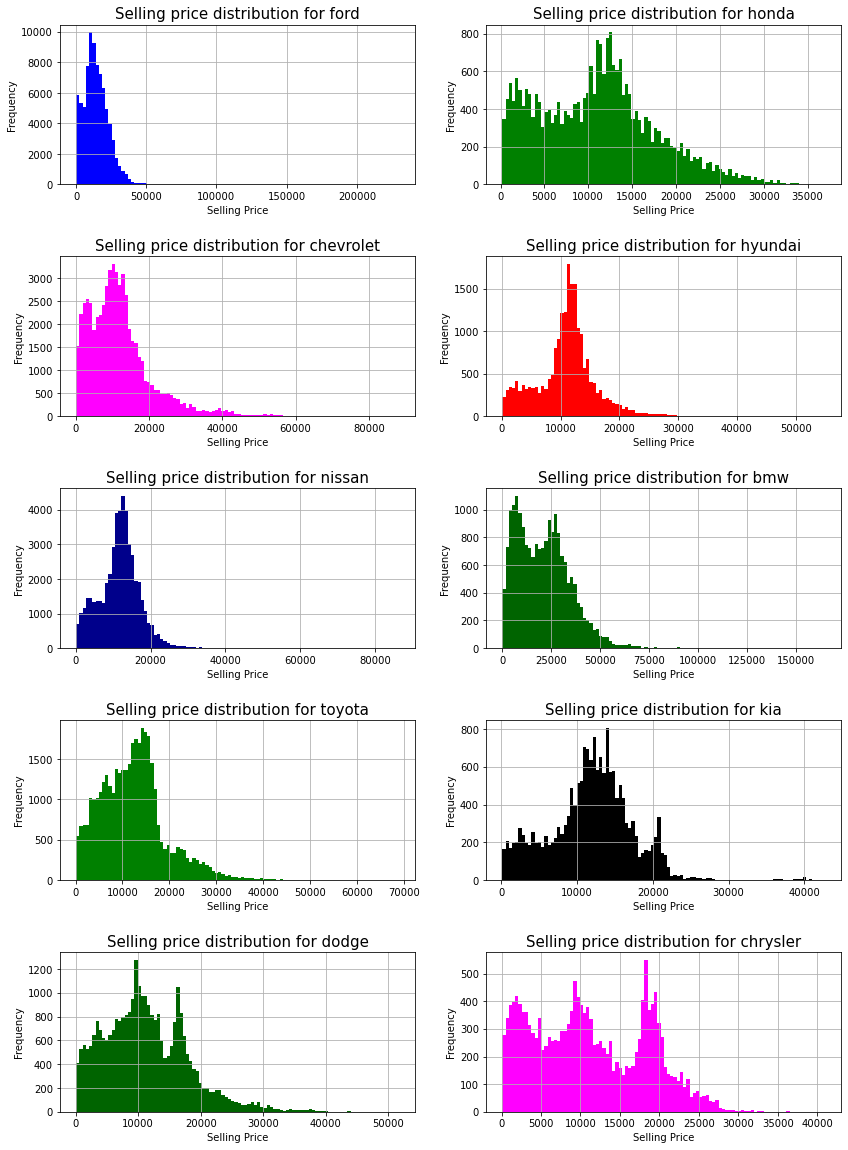

In [45]:
top_make=cars['make'].value_counts()[:10].index
top_make
fig,ax=plt.subplots(5,2,figsize=(14,20))
color_list=['red','yellow','blue','green','black','magenta','cyan','pink','darkgreen','darkblue']
i=0
for t in top_make:
    cars.loc[cars['make']==t,'sellingprice'].hist(ax=ax[i%5][i//5],bins=100,color=np.random.choice(color_list,replace=False))
    ax[i%5][i//5].set_xlabel('Selling Price',fontsize=10)
    ax[i%5][i//5].set_ylabel('Frequency',fontsize=10)
    ax[i%5][i//5].set_title(f'Selling price distribution for {t}',fontsize=15)
    plt.subplots_adjust(hspace=0.45)
    i+=1

- Most fluctuation in price in top 10 make is for Honda followed by chrysler.

In [46]:
# Top 10 seller by revenue
top_seller = cars.groupby('seller').agg('sum').sort_values(by = 'sellingprice', ascending=False)[:10]['sellingprice']
top_seller

seller
ford motor credit company,llc             291107725
nissan-infiniti lt                        250977310
the hertz corporation                     246502447
nissan infiniti lt                        199314971
avis corporation                          196625280
financial services remarketing (lease)    156765600
enterprise veh exchange/rental            123672887
santander consumer                        118086140
tdaf remarketing                          113210525
mercedes-benz financial services          110676500
Name: sellingprice, dtype: int64

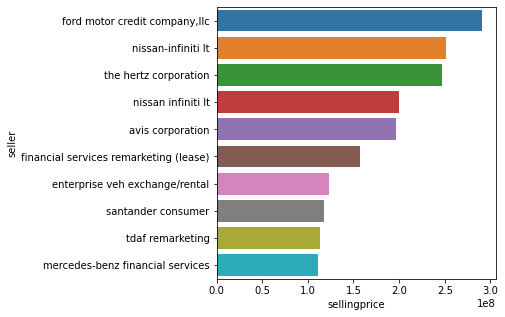

In [47]:
plt.figure(figsize = (5,5))
sns.barplot(y = top_seller.index, x = top_seller, orient = 'h');

- Most revenue is generated by 'ford motor credit company llc' then 'nissan-infiniti lt' and then 'the hertz corporation'.

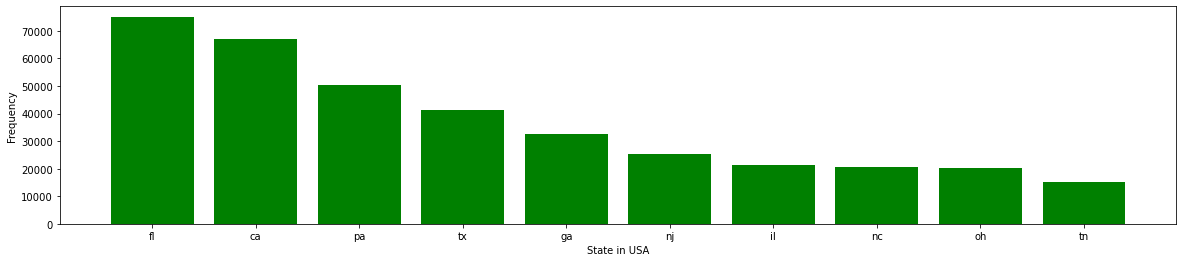

In [48]:
# Top 10 states that have most cars
plt.figure(figsize = (20, 4))
plt.bar(x = cars.state.value_counts()[:10].index, height = cars.state.value_counts()[:10], color = 'g')
plt.xlabel('State in USA')
plt.ylabel('Frequency')
plt.show()

- Most numbers of cars a|re from florida and then california.

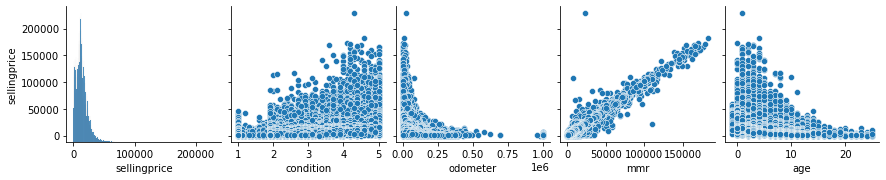

In [49]:
# Pair Plot of Numerical columns vs selling price
num_cols=['sellingprice', 'condition', 'odometer', 'mmr', 'age'] # Numerical Columns
sns.pairplot(cars, x_vars = num_cols, y_vars = 'sellingprice');

- Only mmr is linearly correlated with selling price.

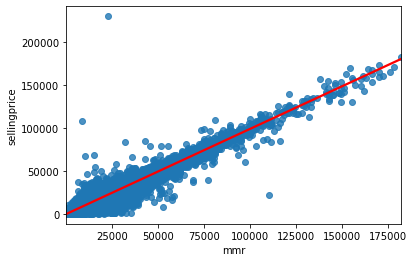

In [50]:
# Fitting the best fit line selling price ~ mmr
sns.regplot(x = 'mmr', y = 'sellingprice', data = cars, line_kws={'color':'red'});

### Label Encoding

In [51]:
# % unique values in categorical data
cars.select_dtypes(exclude = np.number).nunique()/len(cars)*100

make            0.010406
model           0.150399
trim            0.294319
body            0.008639
transmission    0.000393
state           0.007461
color           0.003731
interior        0.003338
seller          2.487478
dtype: float64

In [52]:
# unique values in categorical data
cars.drop(num_cols, axis=1).nunique()

make               53
model             766
trim             1499
body               44
transmission        2
state              38
color              19
interior           17
seller          12669
dtype: int64

Because there is only one column that has only 2 unique values, and all other has very high number as unique values, so i am only applying label encoding for all the categorical features.

In [53]:
# Encoding the categorical data
from sklearn.preprocessing import LabelEncoder
le = []
cols = cars.select_dtypes(exclude = np.number).columns
for i, j in enumerate(cols):
    le.append(LabelEncoder())
    cars[j] = le[i].fit_transform(cars[j])

In [54]:
cars.head()

,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,age
2,14,276,1498,42,0,36,2.0,148585.0,17,6,6859,1725,1750,7
3,14,276,1498,42,0,33,1.9,95675.0,14,6,7151,2700,1000,10
4,14,276,1498,42,0,6,2.7,140870.0,2,6,1135,1875,2400,10
5,14,276,1498,42,0,37,2.8,87536.0,7,6,7981,3000,4700,10
6,14,276,1498,42,0,22,3.7,71340.0,6,13,10991,4400,5100,8


In [55]:
cars.dtypes

make              int32
model             int32
trim              int32
body              int32
transmission      int32
state             int32
condition       float64
odometer        float64
color             int32
interior          int32
seller            int32
mmr               int64
sellingprice      int64
age               int64
dtype: object

- Now all the columns are numerical.

In [56]:
# Making a copy the data
#cars.to_csv('cars.csv')
data = cars.iloc[:, :]

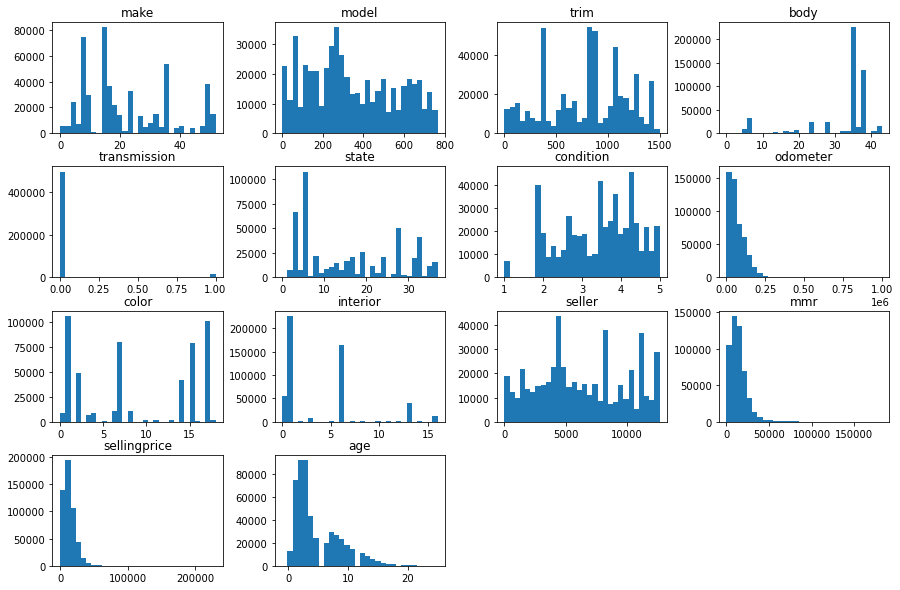

In [57]:
# Histogram for the cars dataset
cars.hist(figsize = (15, 10), grid = False, bins = 30);

- Odometer, mmr, age, selling price are right skewed here.

### Correlation Matrix

In [58]:
corr_matrix = cars.corr()
corr_matrix

,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,age
make,1.000000,0.044247,-0.093541,0.045276,0.041592,-0.031515,-0.019022,-0.020146,-0.003392,-0.001225,0.160506,-0.066864,-0.064537,0.013484
model,0.044247,1.000000,0.110702,0.034281,0.009128,0.022676,-0.005326,0.055938,0.003871,0.009352,0.034481,0.009496,0.009803,0.042524
trim,-0.093541,0.110702,1.000000,-0.008386,-0.009861,0.045634,0.048231,-0.015768,0.024146,0.014337,-0.038244,0.032948,0.030706,-0.067617
body,0.045276,0.034281,-0.008386,1.000000,-0.130692,0.017725,0.007748,0.025454,-0.013261,0.016378,-0.006539,-0.114569,-0.114788,-0.025505
transmission,0.041592,0.009128,-0.009861,-0.130692,1.000000,0.005840,-0.027782,0.031388,-0.014533,-0.017405,0.001974,-0.044000,-0.045979,0.084292
state,-0.031515,0.022676,0.045634,0.017725,0.005840,1.000000,0.021028,-0.005842,-0.016464,0.041281,0.010680,0.007170,0.003052,-0.013331
condition,-0.019022,-0.005326,0.048231,0.007748,-0.027782,0.021028,1.000000,-0.534866,0.040428,-0.124664,-0.020387,0.483615,0.538377,-0.544441
odometer,-0.020146,0.055938,-0.015768,0.025454,0.031388,-0.005842,-0.534866,1.000000,-0.004678,0.168958,-0.001725,-0.583987,-0.578375,0.772509
color,-0.003392,0.003871,0.024146,-0.013261,-0.014533,-0.016464,0.040428,-0.004678,1.000000,0.035434,0.016657,-0.021990,-0.015762,-0.033963
interior,-0.001225,0.009352,0.014337,0.016378,-0.017405,0.041281,-0.124664,0.168958,0.035434,1.000000,-0.014471,-0.132367,-0.133059,0.194757


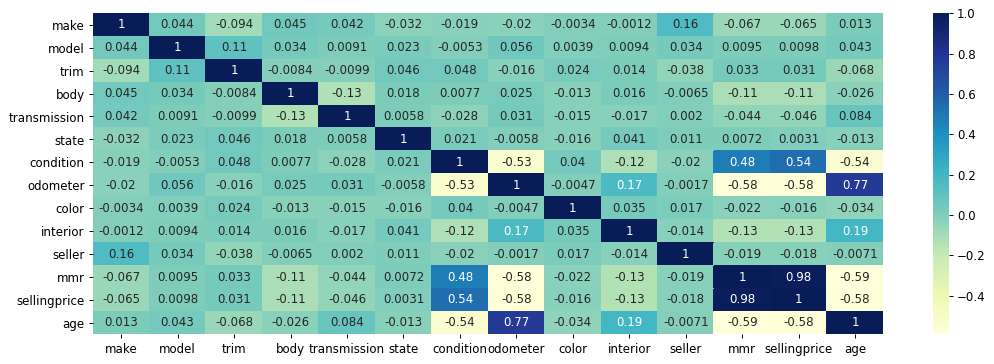

In [59]:
plt.figure(dpi=85, figsize = (15,5))
ax = sns.heatmap(cars.corr(), cmap="YlGnBu", annot=True)

- age and odometer are strongly correlated because If Age increases then Odometer also increases.
- mmr and sellingprice are also strongly correlated because if mmr is high then price is also high, therefore mmr is the good indicator of price.
- age and selling price is also strongly correlated but in negative way as age increases price of the car decreases.

In [60]:
corr_matrix['sellingprice'].sort_values(ascending=False)

sellingprice    1.000000
mmr             0.983609
condition       0.538377
trim            0.030706
model           0.009803
state           0.003052
color          -0.015762
seller         -0.018407
transmission   -0.045979
make           -0.064537
body           -0.114788
interior       -0.133059
odometer       -0.578375
age            -0.580782
Name: sellingprice, dtype: float64

odometer, age, condition and mmr are strongly correlated with sellingprice so these are good predictor of selling price of the car.

## Data Modeling
### Regression Analysis
Regression analysis helps one understand how the typical value of the dependent variable changes when any one of the independent variables is varied, while the other independent variables are held fixed. Thus, it provides a good basis for estimating the cost and duration. If y is a dependent variable and x1, x2, …, xk are independent variables then the multiple regression model provides a prediction of y from the xi of the form:

Y = β0 + β1x1 + β2x2 + … + βkxk + ε

Where β0 + β1x1 + β2x2 + … + βkxk is the deterministic portion of the model and ε is the random error. We further assume that for any given values of the xi the random error ε is normally and independently distributed. 

The multiple regression model is based on the following assumptions: 
- Linearity: The dependent variable y can be expressed as a linear combination of the independent variables x1, x2, …, xk. 
- Independence: Observations are selected independently and randomly from the population. 
- Normality: Observations are normally distributed. 
- Homoscedasticity: Error terms should have constant variance.
- No Autocorrelation: Consecutive error terms should not be correlated.
- No Multicollinearity: Independent Variables should not be strongly correlated to each other.

There are mainly four regression models
- Linear Regression --- 1. Simple Linear Regression 2. Multiple Linear Regression
- Support Vector Regressor
- Decision Tree Regressor
- Random Forest Regressor

I will use Multiple Linear Regression Model Here.

### Multiple Linear Regression

In [61]:
# Splitting the data into dependent and independent variables
X = cars.drop(['sellingprice'], axis=1).values # Independent
y = cars['sellingprice'].values #Dependent Variable

In [62]:
X.shape, y.shape

((509311, 13), (509311,))

### Splitting the dataset into Training set and Test set

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

I split the dataset into two parts training set and test set, X_train, y_train are the training set independent and dependent variables will be used to train the regression model,
and X_test and y_test are the testing set will be used to test the model.

### Fitting the Multiple Linear Regression at Training Set

In [64]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### Predicting the train set and test set

In [65]:
y_pred = lr.predict(X_test)

### Residuals

In [66]:
data = pd.DataFrame({'Actual':y_test, 'Predictions':y_pred, 'Residuals': (y_test-y_pred)})
data.head()

,Actual,Predictions,Residuals
0,4400,4974.349094,-574.349094
1,22000,23089.442148,-1089.442148
2,950,1113.731470,-163.731470
3,18200,16014.611328,2185.388672
4,24400,26213.389156,-1813.389156


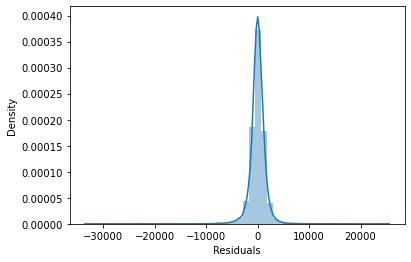

In [67]:
# Plot a histogram of the residuals and make sure it looks normally distributed.
sns.distplot((data.Residuals));

Error terms look like normally distributed.

### Evaluating the model

In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
MSE = mean_squared_error(y_test, y_pred)
RMSE = MSE**0.5
MAE = mean_absolute_error(y_test, y_pred)
RSquared = r2_score(y_test, y_pred)
print(f"""
Mean Squared Error: {MSE}
Root Mean Squared Error: {RMSE}
Mean Absolute Error: {MAE}
R Squared: {RSquared}""")


Mean Squared Error: 2309084.6721928953
Root Mean Squared Error: 1519.5672647806332
Mean Absolute Error: 982.2882377879719
R Squared: 0.974400609646132


- Because R Squared is good but Mean Absolute Error or other errors are very high, so now I will try to improve my multiple linear regression model.

### Stepwise selection

It is a method under sequential selection for selection of best model in case of number of independent variables and hence no. of models.

STEPWISE SELECTION ALGORITHM STEPS:
1. Start with the model having no independent variable.
2. Compute partial F-values for each of the independent variable.
3. Identify the variable which corresponds to highest partial F-value and add it to the model.
4. Compute partial F-values for remaining variables in presence of previously selected variables and identify the variable which corresponds to highest partial F-value and add it to the model if corresponding partial F-value > some threshold value.
5. All the variables which have been included in the model are tested for their significance in presence of other variables in model. All the variables which are no longer significant in presence of other variables in model are removed.
6. This algorithm terminates if at any stage we cannot add any additional variable into the model and all the variables which are there in the model are significant. 

- Partial F-value = (( ESS(full model)- ESS(full model except xj ))/(RMS(full model))
- f_regression: f_regression in python is used for calculating F-value for each model to check significance of model, such as price ~ sqft_living, price ~ lot, price ~ floors and etc. for all explanatory variables.
- anova_lm:  anova_lm in python is used for calculating partial f-value to check significance of explanatory variables in the model. 

In [69]:
# Libraries required
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.feature_selection import f_regression
from statsmodels.stats.anova import anova_lm

In [70]:
df = cars

In [71]:
# Initial Iteration
X = df.drop(columns = 'sellingprice')
y = df['sellingprice']

X = sm.add_constant(X)
mreg = sm.OLS(y, X).fit()
display(mreg.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sellingprice   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 1.445e+06
Date:                Thu, 22 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:00:54   Log-Likelihood:            -4.4686e+06
No. Observations:              509311   AIC:                         8.937e+06
Df Residuals:                  509297   BIC:                         8.937e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -3354.2912     17.577   -190.830      0.000   -3388.742   -3319.840
make             0.6950      0.155      4.491      0.000       0.392       0.998
model           -0.0094      0.010     -0.910      0.363      -0.030       0.011
trim            -0.0723      0.006    -12.621      0.000      -0.083      -0.061
body            -5.5051      0.243    -22.688      0.000      -5.981      -5.030
transmission  -267.8621     12.782    -20.956      0.000    -292.914    -242.810
state           -4.1741      0.191    -21.827      0.000      -4.549      -3.799
condition      981.8905      2.890    339.804      0.000     976.227     987.554
odometer         0.0017   6.93e-05     24.900      0.000       0.002       0.002
color            3.7766      0.340     11.100      0.000       3.110       4.443
interior        -3.9400      0.546     -7.219      0.000      -5.010      -2.870
seller           0.0050      0.001      8.210      0.000       0.004       0.006
mmr              0.9691      0.000   3174.864      0.000       0.968       0.970
age             83.6326      0.963     86.823      0.000      81.745      85.521
==============================================================================
Omnibus:                   579506.964   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      10311709475.007
Skew:                           4.347   Prob(JB):                         0.00
Kurtosis:                     700.021   Cond. No.                     6.94e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.94e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
#F Score and P-Value of Individual Models (sellingprice ~ Individual_Feature)
(F, pval) = f_regression(X, y)
pd.DataFrame({'F-Score':F,'P-Value':pval}, index = X.columns)

,F-Score,P-Value
const,NaN,NaN
make,2.130154e+03,0.000000e+00
model,4.894413e+01,2.636803e-12
trim,4.806746e+02,1.707542e-106
body,6.800375e+03,0.000000e+00
transmission,1.078980e+03,2.167088e-236
state,4.744758e+00,2.938815e-02
condition,2.078759e+05,0.000000e+00
odometer,2.560146e+05,0.000000e+00
color,1.265694e+02,2.326389e-29


In [73]:
# Other Iterations
index = list()

for i in range(1,len(df.columns)+1):
    if max(F[1:len(df.columns)+1]) == F[i] and max(F[1:len(df.columns)+1]) > stats.f.ppf(q = 1-0.05, dfn = 2, dfd = len(df) - (2+1)):
        index.append(i)
        break
    
modeled_X = df.iloc[:,index]
modeled_X.head()

for j in range(len(df.columns)-2):
    #f test for adding column for model significance
    fvalue1 = []
    for i in range(len(df.columns)-1):
        if i+1 not in index:
            index1 = index + [i+1]
            X = df.iloc[:,index1]
            X = sm.add_constant(X)
            mreg = sm.OLS(y, X).fit()
            #display(mreg.summary())
            fvalue1.append(mreg.fvalue)
        else:
            fvalue1.append(0)
    
    for i in range(len(df.columns)-1):
        if max(fvalue1) == fvalue1[i] and max(fvalue1) > stats.f.ppf(q = 1-0.05, dfn = len(index)+1, dfd = len(df) - (len(index)+2)):
            index.append(i+1)
            break
        
    modeled_X = df.iloc[:,index]
    modeled_X.head()
    
    
    #partial f test for removing insignificanct columns
    cols = list(modeled_X.columns)
    X = modeled_X
    X = sm.add_constant(X)
    mreg = sm.OLS(y, X).fit()
    for i in range(len(index)):
        X = modeled_X.drop([cols[i]],axis = 1)
        X = sm.add_constant(X)
        mreg1 = sm.OLS(y, X).fit()
        res = anova_lm(mreg1,mreg)
        if res.F[1] == np.nan or res.F[1]>=stats.f.ppf(q = 0.95, dfn = len(df) - res.df_resid[1], dfd = res.df_resid[1]):
            continue
        elif res.F[1]<stats.f.ppf(q = 0.95, dfn = len(df) - res.df_resid[1], dfd = res.df_resid[1]):
            modeled_X = modeled_X.drop([cols[i]],axis = 1)

In [74]:
# Final model
modeled_X.head()

,sellingprice,mmr,seller,color,interior,body,transmission,condition,model
2,1750,1725,6859,17,6,42,0,2.0,276
3,1000,2700,7151,14,6,42,0,1.9,276
4,2400,1875,1135,2,6,42,0,2.7,276
5,4700,3000,7981,7,6,42,0,2.8,276
6,5100,4400,10991,6,13,42,0,3.7,276


In [75]:
mreg = sm.OLS(modeled_X['sellingprice'], 
              sm.add_constant(modeled_X.iloc[:, 1:])).fit()
mreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sellingprice   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 2.268e+06
Date:                Thu, 22 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:03:13   Log-Likelihood:            -4.4772e+06
No. Observations:              509311   AIC:                         8.954e+06
Df Residuals:                  509302   BIC:                         8.955e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2152.3324     13.244   -162.519      0.000   -2178.289   -2126.375
mmr              0.9504      0.000   3509.484      0.000       0.950       0.951
seller           0.0032      0.001      5.282      0.000       0.002       0.004
color            2.0600      0.345      5.963      0.000       1.383       2.737
interior         4.8660      0.549      8.857      0.000       3.789       5.943
body            -8.1750      0.245    -33.322      0.000      -8.656      -7.694
transmission  -176.0955     12.948    -13.600      0.000    -201.473    -150.718
condition      839.3353      2.709    309.812      0.000     834.025     844.645
model            0.0682      0.010      6.551      0.000       0.048       0.089
==============================================================================
Omnibus:                   567469.395   Durbin-Watson:                   1.838
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       8897547233.582
Skew:                           4.180   Prob(JB):                         0.00
Kurtosis:                     650.460   Cond. No.                     1.11e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Checking Multicollinearity
Multicollinearity is the occurrence of high intercorrelations among two or more independent variables in a multiple regression model.

In [76]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["Independent Variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [77]:
X = modeled_X.iloc[:,1:]
calc_vif(X)

,Independent Variables,VIF
0,mmr,4.155904
1,seller,3.717312
2,color,2.803270
3,interior,1.835246
4,body,8.917122
5,transmission,1.037122
6,condition,13.479607
7,model,3.349038


- condition and body columns have VIF > 5 So I am droping condition first.

In [78]:
X = modeled_X.iloc[:,1:].drop('condition', axis = 1)
calc_vif(X)

,Independent Variables,VIF
0,mmr,2.666362
1,seller,3.597743
2,color,2.687161
3,interior,1.829465
4,body,6.211006
5,transmission,1.029874
6,model,3.289804


- body still have VIF > 5, So, I am droping this also.

In [79]:
X = modeled_X.iloc[:,1:].drop(['condition', 'body'], axis = 1)
calc_vif(X)

,Independent Variables,VIF
0,mmr,2.439938
1,seller,3.058348
2,color,2.466267
3,interior,1.720667
4,transmission,1.028565
5,model,2.866964


Perfect! All the independent variables have VIF<5. Now there is no multicollinearity.

In [80]:
final_data = modeled_X.drop(['condition', 'body'], axis = 1)
mreg = sm.OLS(final_data['sellingprice'], 
              sm.add_constant(final_data.iloc[:, 1:])).fit()
mreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sellingprice   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                 2.530e+06
Date:                Thu, 22 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:03:30   Log-Likelihood:            -4.5213e+06
No. Observations:              509311   AIC:                         9.043e+06
Df Residuals:                  509304   BIC:                         9.043e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -88.5142      8.346    -10.605      0.000    -104.873     -72.156
mmr              0.9910      0.000   3854.204      0.000       0.990       0.991
seller           0.0007      0.001      0.973      0.331      -0.001       0.002
color            8.8122      0.376     23.448      0.000       8.076       9.549
interior        -7.4365      0.597    -12.448      0.000      -8.607      -6.266
transmission  -148.9063     13.983    -10.649      0.000    -176.312    -121.501
model            0.0219      0.011      1.934      0.053      -0.000       0.044
==============================================================================
Omnibus:                   449836.235   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       4642682667.028
Skew:                           2.608   Prob(JB):                         0.00
Kurtosis:                     470.705   Cond. No.                     1.02e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Durbin - Watson tells about autocorrelation if it is close to 0 then there is autocorrelation and if it is close to 2 then there is no autocorrelation.

In [81]:
X = final_data.iloc[:, 1:]
y = final_data.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr.score(X_test, y_test)

0.9679257611117648

In [82]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
MSE = mean_squared_error(y_test, y_pred)
RMSE = MSE**0.5
MAE = mean_absolute_error(y_test, y_pred)
RSquared = r2_score(y_test, y_pred)
print(f"""
Mean Squared Error: \t{MSE}\n
Root Mean Squared Error: \t{RMSE}\n
Mean Absolute Error: \t{MAE}\n
R Squared: \t{RSquared}""")


Mean Squared Error: 	2923102.9770306936

Root Mean Squared Error: 	1709.7084479614334

Mean Absolute Error: 	1088.6393663973952

R Squared: 	0.9679257611117648


## Regularization
### Lasso regression
The goal of lasso regression is to obtain the subset of predictors that minimizes prediction error for a quantitative response variable. The lasso does this by imposing a constraint on the model parameters that causes regression coefficients for some variables to shrink toward zero.

In [83]:
from sklearn.linear_model import Lasso, LassoCV

In [84]:
# LAssoCV returns best alpha and coefficients after performing 10 cross validations
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [85]:
# Best alpha
lassocv.alpha_

0.014860695531828123

In [86]:
# Performing lasso regression
lasso_reg = Lasso(lassocv.alpha_)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.014860695531828123)

In [87]:
# R Squared Value
lasso_reg.score(X_test, y_test)

0.9679257582477364

In [88]:
y_pred = lasso_reg.predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
MSE = mean_squared_error(y_test, y_pred)
RMSE = MSE**0.5
MAE = mean_absolute_error(y_test, y_pred)
RSquared = r2_score(y_test, y_pred)
print(f"""
Mean Squared Error: {MSE}\n
Root Mean Squared Error: {RMSE}\n
Mean Absolute Error: {MAE}\n
R Squared: {RSquared}""")


Mean Squared Error: 2923103.2380454508

Root Mean Squared Error: 1709.708524294551

Mean Absolute Error: 1088.6400843783326

R Squared: 0.9679257582477364


### Ridge Regularization
Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values to be far away from the actual values.

In [89]:
from sklearn.linear_model import Ridge, RidgeCV

In [90]:
# RidgeCV returns best alpha and coefficients after performing 10 cross validations
# We will pass an array of randam numbers for ridgeCV ro select best alpha
alphas = np.random.uniform(low = 0, high = 10, size = (50, ))
ridgecv = RidgeCV(alphas = alphas, cv = 10, normalize = True)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([6.9463409 , 6.95346515, 2.06634431, 1.13721627, 3.87874295,
       0.02768048, 1.47575981, 8.63526438, 2.96767463, 5.27994181,
       0.39633724, 1.27520081, 9.07556569, 0.51720266, 2.41623637,
       7.65059191, 9.08537651, 7.15450445, 8.94632401, 7.14782638,
       7.36903387, 7.92268383, 9.89021809, 7.23704719, 1.34758632,
       0.78141158, 2.97398333, 7.58603751, 3.35722643, 0.36053081,
       5.03762569, 1.48185552, 2.28851757, 6.5213762 , 0.41551581,
       3.07881307, 6.70264319, 3.94701775, 6.19578213, 1.23315472,
       6.4082432 , 8.17632728, 1.93882356, 8.16263108, 5.18583104,
       1.49392189, 2.00599929, 9.78409478, 0.70916535, 4.36469883]),
        cv=10, normalize=True)

In [91]:
ridgecv.alpha_

0.02768048167185011

In [92]:
# Performing ridge regression
ridge_reg = Ridge(ridgecv.alpha_)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.02768048167185011)

In [93]:
ridge_reg.score(X_test, y_test)

0.9679257611101504

In [94]:
y_pred = ridge_reg.predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
MSE = mean_squared_error(y_test, y_pred)
RMSE = MSE**0.5
MAE = mean_absolute_error(y_test, y_pred)
RSquared = r2_score(y_test, y_pred)
print(f"""
Mean Squared Error: \t{MSE}\n
Root Mean Squared Error: \t{RMSE}\n
Mean Absolute Error: \t{MAE}\n
R Squared: \t{RSquared}""")


Mean Squared Error: 	2923102.977177814

Root Mean Squared Error: 	1709.7084480044584

Mean Absolute Error: 	1088.6393668827159

R Squared: 	0.9679257611101504


## Conclusion

Data Cleaning
- Renamed the values like replace _ by None.
- Imputed ‘automatic’ instead of null values in transmission.
- Dropped all other null values.
- Converted all the categorical values in lower case because there were some values in both lowercase and in capitalize case.
- Dropped vin categorical column because it had 98.5% unique values.
- Created saleyear column using saledate and then age column using saleyear-year
- Dropped unnecessary columns like year, saleyear, saledate

Data Exploration
Analyzed the saleprice
– It had right skewed distribution, and lot of outliers in the right because of luxury cars, tried to convert into log normalization and sqrt normalization

Data Preprocessing
- Performed Label Encoding like converted transmission column instead of automatic/manual into 0/1.
- Performed Feature scaling, converted sale price into sqrt normalization.
- Created heatmap of correlation matrix and find the correlation of each column with selling price.
- age and odometer are strongly correlated because If Age increases then Odometer also increases.
- mmr and sellingprice are also strongly correlated because if mmr is high then price is also high, therefore mmr is the good indicator of price.
- age and selling price is also strongly correlated but in negative way as age increases price of the car decreases

Data Modeling
- Because target variable is continuous So, I need to apply regression i.e. supervised machine learning method.
- In the dataset I had 5L+ entries and 10+ columns.
- Used Stepwise Selection method to select the best features to improve the Adjusted R Squared.
- Used VIF to remove multicollinearity
- Used Lasso and Ridge regression to check if it improves the model.

Final Results of the model.

- Mean Squared Error: 	2923102.977177814
- Root Mean Squared Error: 	1709.7084480044584
- Mean Absolute Error: 	1088.6393668827159
- R Squared: 	0.9679257611101504


<h1><center>Thank You<center></h1>